# 911 Calls Data Analysis

# Introduction

In this project I will be analyzing some calls to 911 (emergency calls) in Montgomery County Pennsylvania, the data is obtained from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

# Preliminaries
Loading the various packages required to complete the work and set up the plotting environment.

In [131]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Description of the data set 
Loading the data set to a dataframe and take a quick look at it.

In [132]:
#Read in the csv file as a dataframe called df
df=pd.read_csv('911.csv')

In [133]:
#Check the info() of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [134]:
#Check the head of df 
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [135]:
#number of null values in each column
df.isna().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

The data set contains 663522 rows including the observations of the location info ('lat' and 'lng','desc','zip','twp','addr'), reason for the call ('title'), time of the call ('timeStamp'). Last column ('e') contains a dummy variable which is always 1 and can be ignored.
Data related to 'zip codes' and 'twp' has null values with number of 80199 and 293 repectively.

# Questions

Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions I'll try to answer using my data analysis skills.

* From where the calls come most?
* Which are the top townships for calls?
* How many unique title??
* What is the reason for most calls?
* What is the most common time for calls?

In [136]:
#top 5 zipcodes for 911 calls:
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [137]:
#top 5 townships (twp) for 911 calls:
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [138]:
#number of unique title codes:
df['title'].nunique()

148

###  Reason for most calls:
For this purpose, I need to create some new features
For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

In [142]:
#creating a check point
df_reason_added=df.copy()

In [143]:
#creating new column, named 'reason', which shows main reason of each call

df_reason_added['reason']=df_reason_added['title'].apply(lambda x:x.split(':')[0])

In [145]:
#different reasons for call
df_reason_added['reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [146]:
#number of reasons 
reason_counts=df_reason_added['reason'].value_counts()

Text(0.5, 1.0, 'count of calls per reason')

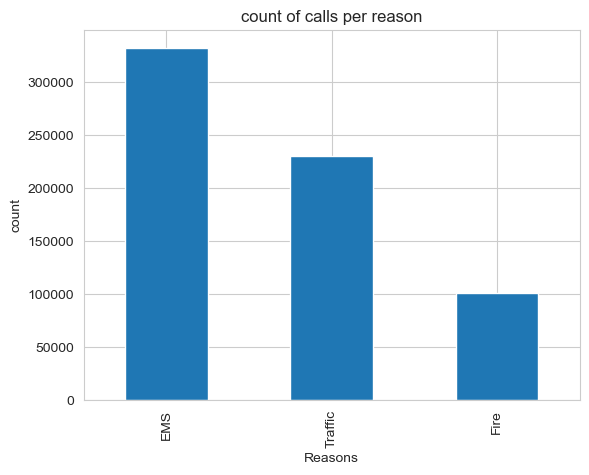

In [147]:
#plotting the count of calls for each reason ('EMS', 'Fire', 'Traffic')
reason_counts.plot(kind='bar',grid=True)
plt.xlabel('Reasons')
plt.ylabel('count')
plt.title('count of calls per reason')

As it is clear from the result, the number of calls for different reasons are:
* Count of calls for EMS: 332,692
* Count of calls for Traffic: 230,208
* Count of calls for Fire: 100,622
    

### Time of the calls
data type for column timeStamp is string. First of all, I should convert timeStamp data type to DateTime object. Then, features such as 'Year', 'month' , 'day of week',and 'hour' are exstracted from timeStamp column for the further analysis.

In [148]:
type(df_reason_added['timeStamp'][0])

str

In [151]:
#creating a check point
df_time_mod=df_reason_added.copy()

In [153]:
#converting the data type of timeStamp column from str to DateTime
df_time_mod['timeStamp']=pd.to_datetime(df_time_mod['timeStamp'])
type(df_time_mod['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [155]:
#extracting 'Year', 'month' , 'day of week', 'hour' from timeStamp column
df_time_mod['year']=df_time_mod['timeStamp'].apply(lambda x:x.year)
df_time_mod['month']=df_time_mod['timeStamp'].apply(lambda x:x.month)
df_time_mod['day_of_week']=df_time_mod['timeStamp'].apply(lambda x:x.day_of_week)
df_time_mod['hour']=df_time_mod['timeStamp'].apply(lambda x:x.hour)

In [157]:
#defining day and month dictionary 
day_map={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
month_map={1:'jan', 2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}

In [160]:
#convert the number for 'day of week' and 'month' to str for the better understanding
df_time_mod['month']=df_time_mod['month'].map(month_map)
df_time_mod['day_of_week']=df_time_mod['day_of_week'].map(day_map)

### Purpose of the "time analysis"
In this part I want to see if there are some patterns between the number of calls and time features such as 'Year', 'month' , 'day of week',and 'hour'.

#### 1- Analysing the number of calls in diffrent years:

<AxesSubplot:xlabel='year', ylabel='count'>

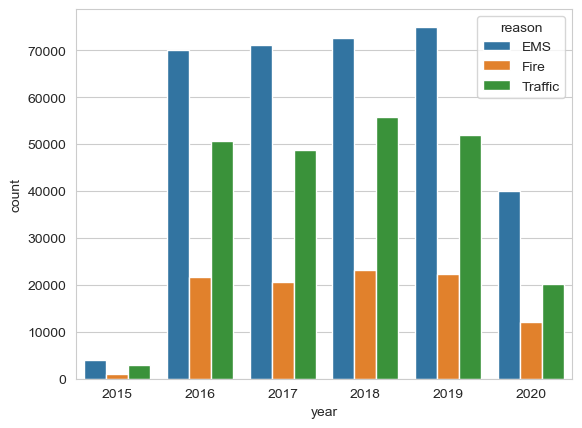

In [238]:
#plotting the count of calls in different years for different reasons
sns.countplot(x='year',data=df_time_mod,hue='reason')

In [176]:
print('start:', df_time_mod['timeStamp'].min())
print('end:',df_time_mod['timeStamp'].max())

start: 2015-12-10 14:39:21
end: 2020-07-29 15:54:08


At the first glance it seems that the number of calls in 2015 and 2020 are less than the other years, but we should keep in mind that these years are not fully considered, it means in 2015, data for calls started at 2015-12-10 and in 2020, we have only data until 2020-07-29.
Having considered this fact we can calculate the daily average number of calls per year to compare different years.

In [234]:
#extracting date
df_time_mod['date']=df_time_mod['timeStamp'].apply(lambda x:x.date())

In [231]:
#calculate the number of calls in each day in different years
groupby_date=df_time_mod['timeStamp'].groupby([df_time_mod['year'],df_time_mod['date']]).count()

In [235]:
#calculating daily average call in different years
years=df_time_mod['year'].unique()
for i in years:
    print('daily average call to 911 in',i,'is',round(groupby_date.loc[i,:].mean()))

daily average call to 911 in 2015 is 360
daily average call to 911 in 2016 is 389
daily average call to 911 in 2017 is 385
daily average call to 911 in 2018 is 415
daily average call to 911 in 2019 is 409
daily average call to 911 in 2020 is 342


According to the average daily calls to 911 in different years, it seems that daily average calls in 2020 was the least with 342 daily average call, and in 2018 and 2019 had the highest daily average call with number of 415 and 409 calls respectively. 

#### 2- Analysing the number of calls in diffrent days of the week:

Text(0, 0.5, 'count of calls')

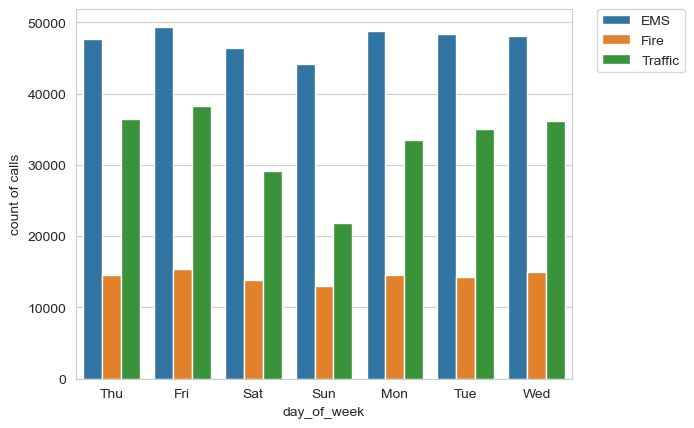

In [281]:
sns.countplot(x='day_of_week',data=df_time_mod,hue='reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('count of calls')

according to the result related to the day of the week, it seems that the number of calls in the weekend are less than week days.

#### 3- Analysing the number of calls in diffrent hours

To have a more sensible comparison for different hours, heatmap is a good option.

In [294]:
day_hour=df_time_mod.groupby(['day_of_week','hour']).count()['reason'].unstack()
day_hour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


<AxesSubplot:xlabel='hour', ylabel='day_of_week'>

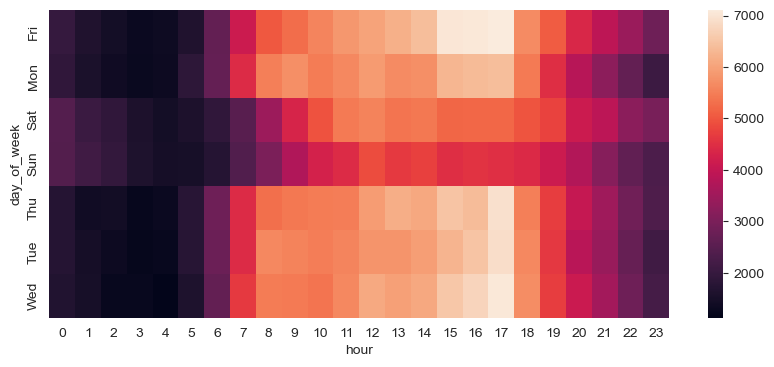

In [295]:
plt.figure(figsize=(10,4))
sns.heatmap(day_hour)

Above heatmap shows the number of calls in different hours on different days of the week in a colored matrix in which the lighter color indicates higher values for count of calls.
According to the heatmap, it is clearly visible that the number of calls are higher during day time hours (between 8 and 18). Also we can see that on the weekend (Saturday and Sunday) the number of calls are less than the other days.


<AxesSubplot:xlabel='reason', ylabel='hour'>

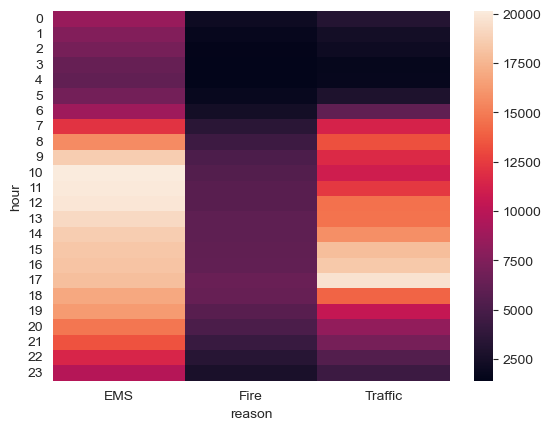

In [278]:
# Analyzing the number of calls in different hours for different reasons
sns.heatmap(df_time_mod.groupby(['hour','reason']).count()['lat'].unstack())

<AxesSubplot:xlabel='month', ylabel='count'>

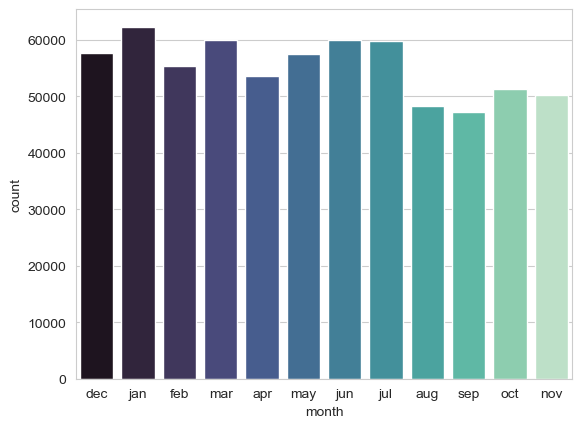

In [262]:
#number of calls in different months
sns.countplot(x='month',data=df_time_mod,palette='mako')

In [267]:
df_time_mod['month'].value_counts()

jan    62336
jun    60034
mar    60027
jul    59832
dec    57692
may    57509
feb    55427
apr    53671
oct    51240
nov    50182
aug    48359
sep    47213
Name: month, dtype: int64

According to the above results, it can be seen that the number of calls in January was the highest with 62336 calls and September was the lowest with 47213 total calls.